In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, roc_auc_score, roc_curve, auc
import seaborn as sns

In [2]:
df = pd.read_csv("data/ML_dataset.csv", sep=";")
df.tail()

,Datetime,Price,Year,Month,Day,Hour,WindSpeed,Temperature
8873,2022-11-03 20:00:00+00:00,8.438,2022,11,3,20,5.5,6.9
8874,2022-11-03 21:00:00+00:00,6.650,2022,11,3,21,5.3,6.8
8875,2022-11-03 22:00:00+00:00,2.541,2022,11,3,22,5.6,7.0
8876,2022-11-03 23:00:00+00:00,1.830,2022,11,3,23,5.1,6.8
8877,2022-11-04 00:00:00+00:00,1.755,2022,11,4,0,5.7,6.8


In [3]:
df.to_json('data/ML_dataset.json', indent=4, orient='records',  lines=True)

In [317]:
#split_ind = 8541
#split_ind = 8733
split_ind = 8253
X = df.iloc[:,3:][:split_ind]
y = df.iloc[:,1][:split_ind]
X_val = df.iloc[:,3:][split_ind:]
y_val = df.iloc[:,1][split_ind:]

In [330]:
print(X.tail())
print(X_val.head())
print(X_val)

      Month  Day  Hour  WindSpeed  Temperature
8248     10    8    19       11.6         10.4
8249     10    8    20       11.1         10.3
8250     10    8    21       10.2          9.7
8251     10    8    22        9.5          9.1
8252     10    8    23        9.9          9.7
      Month  Day  Hour  WindSpeed  Temperature
8253     10    9     0        8.4          7.8
8254     10    9     1        9.3          7.0
8255     10    9     2       10.8          7.0
8256     10    9     3       11.9          6.6
8257     10    9     4       11.2          6.3
      Month  Day  Hour  WindSpeed  Temperature
8253     10    9     0        8.4          7.8
8254     10    9     1        9.3          7.0
8255     10    9     2       10.8          7.0
8256     10    9     3       11.9          6.6
8257     10    9     4       11.2          6.3
...     ...  ...   ...        ...          ...
8873     11    3    20        5.5          6.9
8874     11    3    21        5.3          6.8
8875     11  

In [339]:
df.iloc[np.array(X_val.index)].iloc[:,0]

8253    2022-10-09 00:00:00+00:00
8254    2022-10-09 01:00:00+00:00
8255    2022-10-09 02:00:00+00:00
8256    2022-10-09 03:00:00+00:00
8257    2022-10-09 04:00:00+00:00
                  ...            
8873    2022-11-03 20:00:00+00:00
8874    2022-11-03 21:00:00+00:00
8875    2022-11-03 22:00:00+00:00
8876    2022-11-03 23:00:00+00:00
8877    2022-11-04 00:00:00+00:00
Name: Datetime, Length: 625, dtype: object

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [113]:
regressor=xgb.XGBRegressor(eval_metric='rmsle')

# set up our search grid
param_grid = {"max_depth":    range(2,10,1),
              "n_estimators": range(300,1000,100),
             "max_delta_step": range(0,7,1)}
              #"learning_rate": [0.01,0.1,0.2,0.3]}

# try out every combination of the above values
#search = RandomizedSearchCV(regressor, param_grid, cv=3, verbose=3, n_iter=50).fit(X_train, y_train)
search = GridSearchCV(regressor, param_grid, cv=3, verbose=3).fit(X_train, y_train)


print("The best hyperparameters are ",search.best_params_)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits
[CV 1/3] END max_delta_step=0, max_depth=2, n_estimators=300;, score=0.667 total time=   0.2s
[CV 2/3] END max_delta_step=0, max_depth=2, n_estimators=300;, score=0.634 total time=   0.2s
[CV 3/3] END max_delta_step=0, max_depth=2, n_estimators=300;, score=0.650 total time=   0.2s
[CV 1/3] END max_delta_step=0, max_depth=2, n_estimators=400;, score=0.678 total time=   0.3s
[CV 2/3] END max_delta_step=0, max_depth=2, n_estimators=400;, score=0.646 total time=   0.4s
[CV 3/3] END max_delta_step=0, max_depth=2, n_estimators=400;, score=0.666 total time=   0.3s
[CV 1/3] END max_delta_step=0, max_depth=2, n_estimators=500;, score=0.687 total time=   0.3s
[CV 2/3] END max_delta_step=0, max_depth=2, n_estimators=500;, score=0.656 total time=   0.3s
[CV 3/3] END max_delta_step=0, max_depth=2, n_estimators=500;, score=0.672 total time=   0.3s
[CV 1/3] END max_delta_step=0, max_depth=2, n_estimators=600;, score=0.692 total time=   0

[CV 1/3] END max_delta_step=0, max_depth=6, n_estimators=400;, score=0.809 total time=   0.7s
[CV 2/3] END max_delta_step=0, max_depth=6, n_estimators=400;, score=0.800 total time=   0.8s
[CV 3/3] END max_delta_step=0, max_depth=6, n_estimators=400;, score=0.808 total time=   0.7s
[CV 1/3] END max_delta_step=0, max_depth=6, n_estimators=500;, score=0.808 total time=   0.9s
[CV 2/3] END max_delta_step=0, max_depth=6, n_estimators=500;, score=0.801 total time=   0.9s
[CV 3/3] END max_delta_step=0, max_depth=6, n_estimators=500;, score=0.808 total time=   1.5s
[CV 1/3] END max_delta_step=0, max_depth=6, n_estimators=600;, score=0.808 total time=   1.2s
[CV 2/3] END max_delta_step=0, max_depth=6, n_estimators=600;, score=0.801 total time=   1.1s
[CV 3/3] END max_delta_step=0, max_depth=6, n_estimators=600;, score=0.807 total time=   1.1s
[CV 1/3] END max_delta_step=0, max_depth=6, n_estimators=700;, score=0.808 total time=   1.3s
[CV 2/3] END max_delta_step=0, max_depth=6, n_estimators=700

[CV 2/3] END max_delta_step=1, max_depth=2, n_estimators=500;, score=0.617 total time=   0.3s
[CV 3/3] END max_delta_step=1, max_depth=2, n_estimators=500;, score=0.630 total time=   0.6s
[CV 1/3] END max_delta_step=1, max_depth=2, n_estimators=600;, score=0.655 total time=   0.6s
[CV 2/3] END max_delta_step=1, max_depth=2, n_estimators=600;, score=0.632 total time=   0.4s
[CV 3/3] END max_delta_step=1, max_depth=2, n_estimators=600;, score=0.642 total time=   0.4s
[CV 1/3] END max_delta_step=1, max_depth=2, n_estimators=700;, score=0.664 total time=   0.5s
[CV 2/3] END max_delta_step=1, max_depth=2, n_estimators=700;, score=0.644 total time=   0.5s
[CV 3/3] END max_delta_step=1, max_depth=2, n_estimators=700;, score=0.652 total time=   0.5s
[CV 1/3] END max_delta_step=1, max_depth=2, n_estimators=800;, score=0.677 total time=   0.5s
[CV 2/3] END max_delta_step=1, max_depth=2, n_estimators=800;, score=0.653 total time=   0.5s
[CV 3/3] END max_delta_step=1, max_depth=2, n_estimators=800

[CV 3/3] END max_delta_step=1, max_depth=6, n_estimators=600;, score=0.829 total time=   1.1s
[CV 1/3] END max_delta_step=1, max_depth=6, n_estimators=700;, score=0.824 total time=   1.3s
[CV 2/3] END max_delta_step=1, max_depth=6, n_estimators=700;, score=0.806 total time=   1.3s
[CV 3/3] END max_delta_step=1, max_depth=6, n_estimators=700;, score=0.828 total time=   1.2s
[CV 1/3] END max_delta_step=1, max_depth=6, n_estimators=800;, score=0.824 total time=   1.5s
[CV 2/3] END max_delta_step=1, max_depth=6, n_estimators=800;, score=0.806 total time=   1.9s
[CV 3/3] END max_delta_step=1, max_depth=6, n_estimators=800;, score=0.828 total time=   1.9s
[CV 1/3] END max_delta_step=1, max_depth=6, n_estimators=900;, score=0.824 total time=   1.6s
[CV 2/3] END max_delta_step=1, max_depth=6, n_estimators=900;, score=0.806 total time=   1.6s
[CV 3/3] END max_delta_step=1, max_depth=6, n_estimators=900;, score=0.828 total time=   1.6s
[CV 1/3] END max_delta_step=1, max_depth=7, n_estimators=300

[CV 1/3] END max_delta_step=2, max_depth=2, n_estimators=800;, score=0.693 total time=   0.6s
[CV 2/3] END max_delta_step=2, max_depth=2, n_estimators=800;, score=0.669 total time=   0.5s
[CV 3/3] END max_delta_step=2, max_depth=2, n_estimators=800;, score=0.671 total time=   0.6s
[CV 1/3] END max_delta_step=2, max_depth=2, n_estimators=900;, score=0.695 total time=   0.7s
[CV 2/3] END max_delta_step=2, max_depth=2, n_estimators=900;, score=0.673 total time=   0.8s
[CV 3/3] END max_delta_step=2, max_depth=2, n_estimators=900;, score=0.675 total time=   0.7s
[CV 1/3] END max_delta_step=2, max_depth=3, n_estimators=300;, score=0.733 total time=   0.3s
[CV 2/3] END max_delta_step=2, max_depth=3, n_estimators=300;, score=0.709 total time=   0.3s
[CV 3/3] END max_delta_step=2, max_depth=3, n_estimators=300;, score=0.712 total time=   0.5s
[CV 1/3] END max_delta_step=2, max_depth=3, n_estimators=400;, score=0.746 total time=   0.5s
[CV 2/3] END max_delta_step=2, max_depth=3, n_estimators=400

[CV 2/3] END max_delta_step=2, max_depth=6, n_estimators=900;, score=0.807 total time=   1.6s
[CV 3/3] END max_delta_step=2, max_depth=6, n_estimators=900;, score=0.825 total time=   2.0s
[CV 1/3] END max_delta_step=2, max_depth=7, n_estimators=300;, score=0.823 total time=   0.9s
[CV 2/3] END max_delta_step=2, max_depth=7, n_estimators=300;, score=0.812 total time=   0.7s
[CV 3/3] END max_delta_step=2, max_depth=7, n_estimators=300;, score=0.833 total time=   0.6s
[CV 1/3] END max_delta_step=2, max_depth=7, n_estimators=400;, score=0.823 total time=   0.9s
[CV 2/3] END max_delta_step=2, max_depth=7, n_estimators=400;, score=0.814 total time=   0.9s
[CV 3/3] END max_delta_step=2, max_depth=7, n_estimators=400;, score=0.832 total time=   1.0s
[CV 1/3] END max_delta_step=2, max_depth=7, n_estimators=500;, score=0.823 total time=   1.1s
[CV 2/3] END max_delta_step=2, max_depth=7, n_estimators=500;, score=0.814 total time=   1.1s
[CV 3/3] END max_delta_step=2, max_depth=7, n_estimators=500

[CV 3/3] END max_delta_step=3, max_depth=3, n_estimators=300;, score=0.732 total time=   0.3s
[CV 1/3] END max_delta_step=3, max_depth=3, n_estimators=400;, score=0.752 total time=   0.4s
[CV 2/3] END max_delta_step=3, max_depth=3, n_estimators=400;, score=0.725 total time=   0.4s
[CV 3/3] END max_delta_step=3, max_depth=3, n_estimators=400;, score=0.741 total time=   0.4s
[CV 1/3] END max_delta_step=3, max_depth=3, n_estimators=500;, score=0.755 total time=   0.4s
[CV 2/3] END max_delta_step=3, max_depth=3, n_estimators=500;, score=0.727 total time=   0.5s
[CV 3/3] END max_delta_step=3, max_depth=3, n_estimators=500;, score=0.749 total time=   0.5s
[CV 1/3] END max_delta_step=3, max_depth=3, n_estimators=600;, score=0.758 total time=   0.6s
[CV 2/3] END max_delta_step=3, max_depth=3, n_estimators=600;, score=0.732 total time=   0.6s
[CV 3/3] END max_delta_step=3, max_depth=3, n_estimators=600;, score=0.751 total time=   0.6s
[CV 1/3] END max_delta_step=3, max_depth=3, n_estimators=700

[CV 1/3] END max_delta_step=3, max_depth=7, n_estimators=500;, score=0.823 total time=   1.2s
[CV 2/3] END max_delta_step=3, max_depth=7, n_estimators=500;, score=0.805 total time=   1.1s
[CV 3/3] END max_delta_step=3, max_depth=7, n_estimators=500;, score=0.831 total time=   1.1s
[CV 1/3] END max_delta_step=3, max_depth=7, n_estimators=600;, score=0.823 total time=   1.3s
[CV 2/3] END max_delta_step=3, max_depth=7, n_estimators=600;, score=0.805 total time=   1.4s
[CV 3/3] END max_delta_step=3, max_depth=7, n_estimators=600;, score=0.831 total time=   1.3s
[CV 1/3] END max_delta_step=3, max_depth=7, n_estimators=700;, score=0.823 total time=   1.5s
[CV 2/3] END max_delta_step=3, max_depth=7, n_estimators=700;, score=0.805 total time=   1.6s
[CV 3/3] END max_delta_step=3, max_depth=7, n_estimators=700;, score=0.831 total time=   1.5s
[CV 1/3] END max_delta_step=3, max_depth=7, n_estimators=800;, score=0.823 total time=   1.8s
[CV 2/3] END max_delta_step=3, max_depth=7, n_estimators=800

[CV 2/3] END max_delta_step=4, max_depth=3, n_estimators=600;, score=0.731 total time=   0.8s
[CV 3/3] END max_delta_step=4, max_depth=3, n_estimators=600;, score=0.751 total time=   1.2s
[CV 1/3] END max_delta_step=4, max_depth=3, n_estimators=700;, score=0.763 total time=   1.4s
[CV 2/3] END max_delta_step=4, max_depth=3, n_estimators=700;, score=0.735 total time=   0.8s
[CV 3/3] END max_delta_step=4, max_depth=3, n_estimators=700;, score=0.750 total time=   0.9s
[CV 1/3] END max_delta_step=4, max_depth=3, n_estimators=800;, score=0.764 total time=   0.8s
[CV 2/3] END max_delta_step=4, max_depth=3, n_estimators=800;, score=0.735 total time=   0.8s
[CV 3/3] END max_delta_step=4, max_depth=3, n_estimators=800;, score=0.752 total time=   1.7s
[CV 1/3] END max_delta_step=4, max_depth=3, n_estimators=900;, score=0.766 total time=   1.1s
[CV 2/3] END max_delta_step=4, max_depth=3, n_estimators=900;, score=0.739 total time=   0.8s
[CV 3/3] END max_delta_step=4, max_depth=3, n_estimators=900

[CV 3/3] END max_delta_step=4, max_depth=7, n_estimators=700;, score=0.825 total time=   3.8s
[CV 1/3] END max_delta_step=4, max_depth=7, n_estimators=800;, score=0.823 total time=   4.3s
[CV 2/3] END max_delta_step=4, max_depth=7, n_estimators=800;, score=0.815 total time=   2.3s
[CV 3/3] END max_delta_step=4, max_depth=7, n_estimators=800;, score=0.825 total time=   3.5s
[CV 1/3] END max_delta_step=4, max_depth=7, n_estimators=900;, score=0.823 total time=   2.7s
[CV 2/3] END max_delta_step=4, max_depth=7, n_estimators=900;, score=0.815 total time=   2.7s
[CV 3/3] END max_delta_step=4, max_depth=7, n_estimators=900;, score=0.825 total time=   3.4s
[CV 1/3] END max_delta_step=4, max_depth=8, n_estimators=300;, score=0.831 total time=   1.1s
[CV 2/3] END max_delta_step=4, max_depth=8, n_estimators=300;, score=0.817 total time=   1.8s
[CV 3/3] END max_delta_step=4, max_depth=8, n_estimators=300;, score=0.839 total time=   4.1s
[CV 1/3] END max_delta_step=4, max_depth=8, n_estimators=400

[CV 1/3] END max_delta_step=5, max_depth=3, n_estimators=900;, score=0.770 total time=   1.1s
[CV 2/3] END max_delta_step=5, max_depth=3, n_estimators=900;, score=0.738 total time=   1.1s
[CV 3/3] END max_delta_step=5, max_depth=3, n_estimators=900;, score=0.751 total time=   1.8s
[CV 1/3] END max_delta_step=5, max_depth=4, n_estimators=300;, score=0.782 total time=   0.7s
[CV 2/3] END max_delta_step=5, max_depth=4, n_estimators=300;, score=0.766 total time=   0.5s
[CV 3/3] END max_delta_step=5, max_depth=4, n_estimators=300;, score=0.783 total time=   0.5s
[CV 1/3] END max_delta_step=5, max_depth=4, n_estimators=400;, score=0.786 total time=   0.7s
[CV 2/3] END max_delta_step=5, max_depth=4, n_estimators=400;, score=0.771 total time=   0.7s
[CV 3/3] END max_delta_step=5, max_depth=4, n_estimators=400;, score=0.788 total time=   0.8s
[CV 1/3] END max_delta_step=5, max_depth=4, n_estimators=500;, score=0.789 total time=   1.0s
[CV 2/3] END max_delta_step=5, max_depth=4, n_estimators=500

[CV 2/3] END max_delta_step=5, max_depth=8, n_estimators=300;, score=0.811 total time=   1.5s
[CV 3/3] END max_delta_step=5, max_depth=8, n_estimators=300;, score=0.831 total time=   1.3s
[CV 1/3] END max_delta_step=5, max_depth=8, n_estimators=400;, score=0.836 total time=   3.6s
[CV 2/3] END max_delta_step=5, max_depth=8, n_estimators=400;, score=0.812 total time=   2.5s
[CV 3/3] END max_delta_step=5, max_depth=8, n_estimators=400;, score=0.831 total time=   1.5s
[CV 1/3] END max_delta_step=5, max_depth=8, n_estimators=500;, score=0.836 total time=   2.4s
[CV 2/3] END max_delta_step=5, max_depth=8, n_estimators=500;, score=0.812 total time=   4.5s
[CV 3/3] END max_delta_step=5, max_depth=8, n_estimators=500;, score=0.831 total time=   4.9s
[CV 1/3] END max_delta_step=5, max_depth=8, n_estimators=600;, score=0.836 total time=   3.4s
[CV 2/3] END max_delta_step=5, max_depth=8, n_estimators=600;, score=0.811 total time=   2.4s
[CV 3/3] END max_delta_step=5, max_depth=8, n_estimators=600

[CV 3/3] END max_delta_step=6, max_depth=4, n_estimators=400;, score=0.774 total time=   0.5s
[CV 1/3] END max_delta_step=6, max_depth=4, n_estimators=500;, score=0.786 total time=   0.7s
[CV 2/3] END max_delta_step=6, max_depth=4, n_estimators=500;, score=0.771 total time=   0.6s
[CV 3/3] END max_delta_step=6, max_depth=4, n_estimators=500;, score=0.778 total time=   0.8s
[CV 1/3] END max_delta_step=6, max_depth=4, n_estimators=600;, score=0.786 total time=   0.8s
[CV 2/3] END max_delta_step=6, max_depth=4, n_estimators=600;, score=0.773 total time=   1.4s
[CV 3/3] END max_delta_step=6, max_depth=4, n_estimators=600;, score=0.779 total time=   0.9s
[CV 1/3] END max_delta_step=6, max_depth=4, n_estimators=700;, score=0.786 total time=   1.1s
[CV 2/3] END max_delta_step=6, max_depth=4, n_estimators=700;, score=0.773 total time=   1.2s
[CV 3/3] END max_delta_step=6, max_depth=4, n_estimators=700;, score=0.779 total time=   1.5s
[CV 1/3] END max_delta_step=6, max_depth=4, n_estimators=800

[CV 1/3] END max_delta_step=6, max_depth=8, n_estimators=600;, score=0.831 total time=   2.5s
[CV 2/3] END max_delta_step=6, max_depth=8, n_estimators=600;, score=0.813 total time=   2.3s
[CV 3/3] END max_delta_step=6, max_depth=8, n_estimators=600;, score=0.832 total time=   2.2s
[CV 1/3] END max_delta_step=6, max_depth=8, n_estimators=700;, score=0.831 total time=   4.5s
[CV 2/3] END max_delta_step=6, max_depth=8, n_estimators=700;, score=0.813 total time=  11.6s
[CV 3/3] END max_delta_step=6, max_depth=8, n_estimators=700;, score=0.832 total time=   4.4s
[CV 1/3] END max_delta_step=6, max_depth=8, n_estimators=800;, score=0.831 total time=   2.3s
[CV 2/3] END max_delta_step=6, max_depth=8, n_estimators=800;, score=0.813 total time=   4.2s
[CV 3/3] END max_delta_step=6, max_depth=8, n_estimators=800;, score=0.832 total time=   2.5s
[CV 1/3] END max_delta_step=6, max_depth=8, n_estimators=900;, score=0.831 total time=   2.5s
[CV 2/3] END max_delta_step=6, max_depth=8, n_estimators=900

In [309]:
regressor=xgb.XGBRegressor(eval_metric='rmsle',n_estimators=700, max_depth=9, max_delta_step=75, learning_rate=0.1)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmsle', feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=75,
             max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=700, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [310]:
predictions = regressor.predict(X_test)
predictions.shape

(1651,)

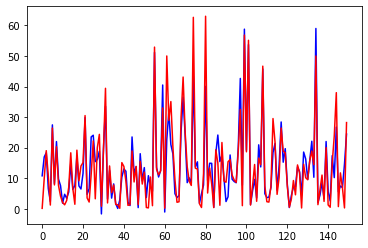

In [311]:
plt.plot(list(predictions[:150]), color='b')
plt.plot(list(y_test[:150]), color='r')

In [319]:
#valid
predictions_val = regressor.predict(X_val)

In [342]:
x_labels = df.iloc[np.array(X_val.index)].iloc[:,0]
with open('data/ML_predictions_Validation.csv', mode="w") as file:
    for i, label in enumerate(x_labels):
        file.write(",".join(str(a) for a in [label, predictions_val[i]]))
        file.write("\n")


In [343]:
x_labels = pd.to_datetime(x_labels)
print(x_labels)

8253   2022-10-09 00:00:00+00:00
8254   2022-10-09 01:00:00+00:00
8255   2022-10-09 02:00:00+00:00
8256   2022-10-09 03:00:00+00:00
8257   2022-10-09 04:00:00+00:00
                  ...           
8873   2022-11-03 20:00:00+00:00
8874   2022-11-03 21:00:00+00:00
8875   2022-11-03 22:00:00+00:00
8876   2022-11-03 23:00:00+00:00
8877   2022-11-04 00:00:00+00:00
Name: Datetime, Length: 625, dtype: datetime64[ns, UTC]


[]

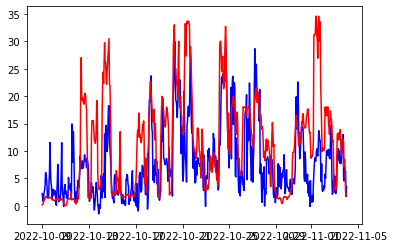

In [344]:
plt.plot(x_labels,list(predictions_val), color='b')
plt.plot(x_labels,list(y_val), color='r')
plt.plot()
